# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Yosafat Galang Aryasatya 
- Email: yg.aryasatya@gmail.com
- Id Dicoding: yosafat_galang_a

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah pengguna yang telah terregistrasi dan yang belum tiap tahunnya?
- Apakah terjadi peningkatan total pengguna layanan bike sharing ini pada tahun 2012 dibandingkan tahun 2011?
- Pada bulan, musim, dan cuaca apa penggunaan jasa paling banyak dan paling sedikit untuk masing-masing tahun?

## Menyiapkan semua library yang dibutuhkan

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile,os

## Data Wrangling

### Gathering Data
Saya akan melakukan analisis data pada dataset __Bike Sharing Dataset__ dan berikut merupakan kode untuk mengekstrak file dataset dalam format .zip.

In [82]:
local_zip = "Bike-sharing-dataset.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r'C:\Users\ACER\Documents\Kuliah\Dicoding\Data-Visualization-Project')
zip_ref.close()

### Assessing Data
Terdapat dua tabel dalam dataset ini yaitu day.csv dan hour.csv.

#### Day Table
- Berikut merupakan 5 baris pertama dari tabel day.csv

In [83]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Saya menggunakan fungsi `.info()` untuk mendapatkan ringkasan informasi nama kolom, jumlah data, dan isi data.

In [84]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari informasi di atas dapat dilihat bahwa jumlah data tabel day.csv sebanyak 731 dan __tidak ada kolom yang kosong__ (non-null berjumlah sama dengan total entry data).  

Namun __ada tipe data yang tidak sesuai__ yaitu kolom __dteday__ yang bertipe object. Kolom dteday seharusnya memiliki tipe __datetime__ sehingga perlu saya ubah pada proses cleaning. 

- Command berikut merupakan cara lain yang menyampaikan informasi lebih jelas mengenai jumlah data yang kosong pada tiap kolom menggunakan fungsi `.isna().sum()`.

In [85]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari informasi di atas dapat dilihat bahwa __tidak ada kolom yang kosong__.

- Saya akan memeriksa jumlah data duplikat dalam tabel menggunakan fungsi `.duplicated().sum()`.

In [86]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Setelah kode dijalankan, dapat dilihat bahwa __tidak ada data yang kembar atau terduplikat__. 

- Saya akan memeriksa anomali pada tabel dengan mengamati parameter statistik (mean, standard deviasi, IQR, dll) dari data pada tabel menggunakan fungsi `.describe()`.

In [87]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari hasil pengamatan saya __tidak terdapat keanehan__ pada parameter statistik tabel day.csv ini.

#### Hour Table

- Tabel hour.csv memiliki format data yang kurang lebih sama hanya saja tabel ini berisi data per jam sehingga terdapat kolom tambahan hr (hour) dan memiliki jumlah data yang lebih banyak daripada day.csv. Sama seperti day.csv, yang perlu diperbaiki pada proses cleaning hanyalah mengubah tipe kolom dteday dari object menjadi datetime. Berikut merupakan lima baris pertama dari tabel hour.csv.

In [88]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Saya menggunakan fungsi `.info()` untuk mendapatkan ringkasan informasi nama kolom, jumlah data, dan isi data. Tidak ada yang salah kecuali tipe data dteday yang sudah disebutkan.

In [89]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Command berikut merupakan cara lain yang menyampaikan informasi lebih jelas mengenai jumlah data yang kosong pada tiap kolom menggunakan fungsi `.isna().sum()`. Tidak ada kolom yang kosong.

In [90]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Tidak ada data duplikat.

In [91]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


-Tidak ada keanehan pada parameter statistik tabel hour.csv.

In [92]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- Mengubah kolom dteday menjadi tipe datetime untuk kedua tabel.

In [93]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [94]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- Untuk memperjelas informasi yang akan disampaikan, data dari beberapa kolom akan diubah dari data numerik menjadi data kategori yang bersesuaian dengan angkanya seperti berikut:
  - season : season (1:springer, 2:summer, 3:fall, 4:winter)
  - yr : year (0: 2011, 1:2012)
  - mnth : month ( 1 to 12)
  - weekday : day of the week (Mon - Sun)
  - weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [95]:
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [96]:
day_df['mnth'] = day_df['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty and Cloudy',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain, Snow, and Mist'
})
day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Misty and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore day.csv
Saya hanya akan menggunakan day.csv karena saya tidak memerlukan informasi per jam untuk menjawab pertanyaan saya. 

1. Membuat tabel yang berisi jumlah pengguna kasual, registered, dan total (kasual+registered) tiap tahunnya.

In [118]:
day_df.groupby(by=["yr"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
yr,,,
2012,372765,1676811,2049576
2011,247252,995851,1243103


2. Membuat tabel yang berisi jumlah pengguna kasual, registered, dan total (kasual+registered) tiap bulan untuk masing-masing tahun.

In [226]:
day_df.groupby(by=["yr", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
yr   mnth                                 
2011 January      3073       35116   38189
     February     6242       41973   48215
     March       12826       51219   64045
     April       22346       72524   94870
     May         31050      104771  135821
     June        30612      112900  143512
     July        36452      104889  141341
     August      28842      107849  136691
     September   26545      100873  127418
     October     25222       98289  123511
     November    15594       86573  102167
     December     8448       78875   87323
2012 January      8969       87775   96744
     February     8721       94416  103137
     March       31618      133257  164875
     April       38456      135768  174224
     May         44235      151630  195865
     June        43294      159536  202830
     July        41705      161902  203607
     August      43197      171306  214503
     September   43778      174795  218573
     October     34538      164303  198841
     November    21009      131655  152664
     December    13245      110468  123713

3. Membuat tabel yang berisi jumlah pengguna kasual, registered, dan total (kasual+registered) berdasarkan musim.

In [99]:
day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
Spring,60622,410726,471348
Summer,203522,715067,918589
Fall,226091,835038,1061129
Winter,129782,711831,841613


4. Membuat tabel yang berisi jumlah pengguna kasual, registered, dan total (kasual+registered) berdasarkan cuaca.

In [100]:
day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weathersit,,,
Clear/Partly Cloudy,446346,1811606,2257952
Misty and Cloudy,169776,827082,996858
Light Snow/Light Rain,3895,33974,37869


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah pengguna yang telah terregistrasi dan yang belum tiap tahunnya?

In [236]:
cr_user_yr_df = day_df.groupby(by=["yr"]).agg({
    "casual": "sum",
    "registered": "sum",
}).reset_index()
cr_user_yr_df.rename(columns={
    "yr": "year",
}, inplace=True)
cr_user_yr_melt_df = cr_user_yr_df.melt(id_vars="year")
cr_user_yr_melt_df

,year,variable,value
0,2011,casual,247252
1,2012,casual,372765
2,2011,registered,995851
3,2012,registered,1676811


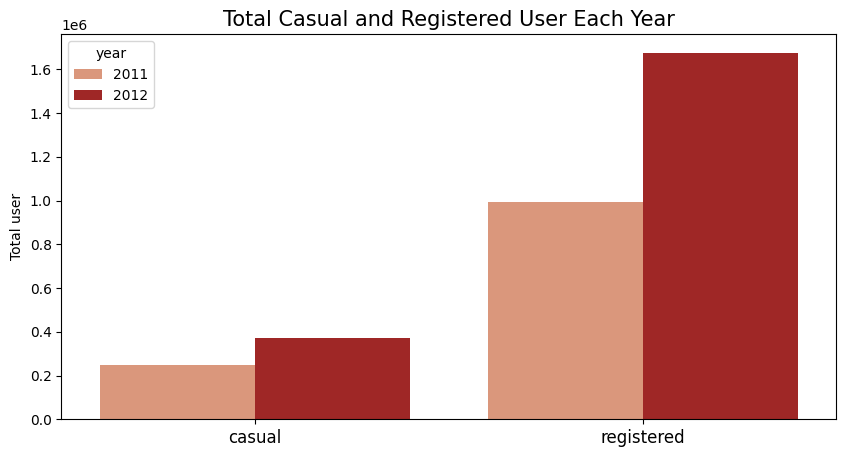

In [237]:
colors = ["#EA906C", "#B31312"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="value",
    x="variable",
    hue="year",
    data=cr_user_yr_melt_df,
    palette=colors
)

plt.title("Total Casual and Registered User Each Year", loc="center", fontsize=15)
plt.ylabel("Total user")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan diagram batang di atas dapat dilihat bahwa jumlah pengguna layanan bike sharing secara kasual dan registered __meningkat secara signifikan__ pada tahun 2012. Jumlah pengguna yang __telah melakukan registrasi__ juga __lebih banyak__ daripada pengguna kasual untuk kedua tahun tersebut.

### Pertanyaan 2: Apakah terjadi peningkatan total pengguna layanan bike sharing ini pada tahun 2012 dibandingkan tahun 2011?

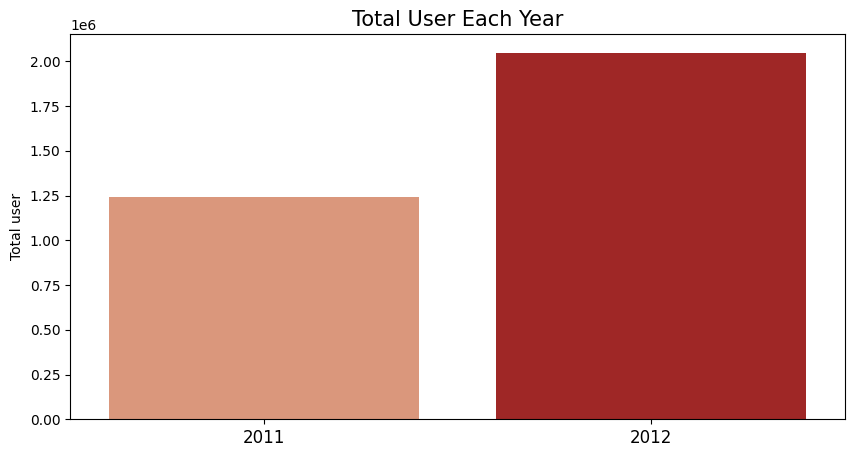

In [161]:
colors = ["#EA906C", "#B31312"]

count_yr_df = day_df.groupby(by=["yr"]).agg({
    "cnt": "sum"
}).reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="yr",
    data=count_yr_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Total User Each Year", loc="center", fontsize=15)
plt.ylabel("Total user")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan diagram batang di atas dapat dilihat bahwa jumlah pengguna layanan bike sharing (kasual (unregistered) dan registered) __meningkat secara signifikan__ pada tahun 2012.  

### Pertanyaan 3: Bagaimana trend jumlah user bike sharing berdasarkan bulan, musim, dan cuaca tiap tahunnya?

In [167]:
monthly_df = day_df.groupby(by=["yr", "mnth"]).agg({
    "cnt": "sum"
}).reset_index()
monthly_df

,yr,mnth,cnt
0,2011,January,38189
1,2011,February,48215
2,2011,March,64045
3,2011,April,94870
4,2011,May,135821
5,2011,June,143512
6,2011,July,141341
7,2011,August,136691
8,2011,September,127418
9,2011,October,123511


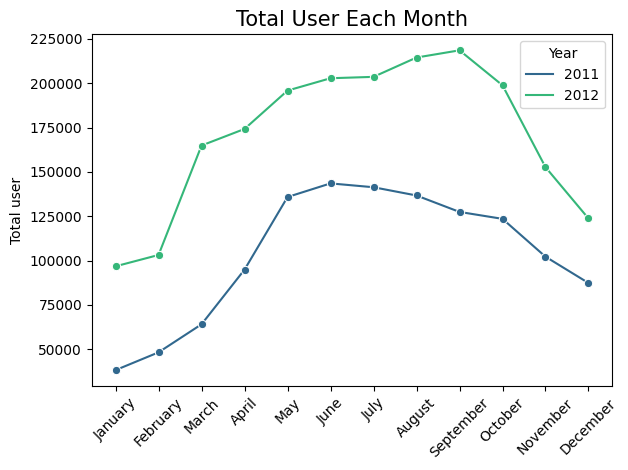

In [224]:
sns.lineplot(
    data=monthly_df,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="viridis",
    marker="o")

plt.title("Total User Each Month", loc="center", fontsize=15)
plt.xlabel(None)
plt.xticks(rotation=45)
plt.ylabel("Total user")
plt.legend(title="Year", loc="upper right")
plt.tight_layout()
plt.show()

Trend dari jumlah user tiap bulan untuk kedua tahun di atas memiliki pola yang mirip yaitu mendapat jumlah terendah pada awal tahun, meningkat dan memuncak pada pertengahan tahun, dan menurun menuju akhir tahun. Jumlah pengguna terendah kedua tahun adalah pada bulan Januari. Pengguna paling banyak menggunakan layanan pada bulan Juni pada tahun 2011 dan bulan September pada tahun 2012.

In [ ]:
season_df = day_df.groupby(by=["yr", "season"]).agg({
    "cnt": "sum"
}).reset_index()
season_df.rename(columns={
    "yr": "year",
    "cnt": "total_user"
}, inplace=True)
season_df

,year,season,total_user
0,2011,Spring,150000
1,2011,Summer,347316
2,2011,Fall,419650
3,2011,Winter,326137
4,2012,Spring,321348
5,2012,Summer,571273
6,2012,Fall,641479
7,2012,Winter,515476


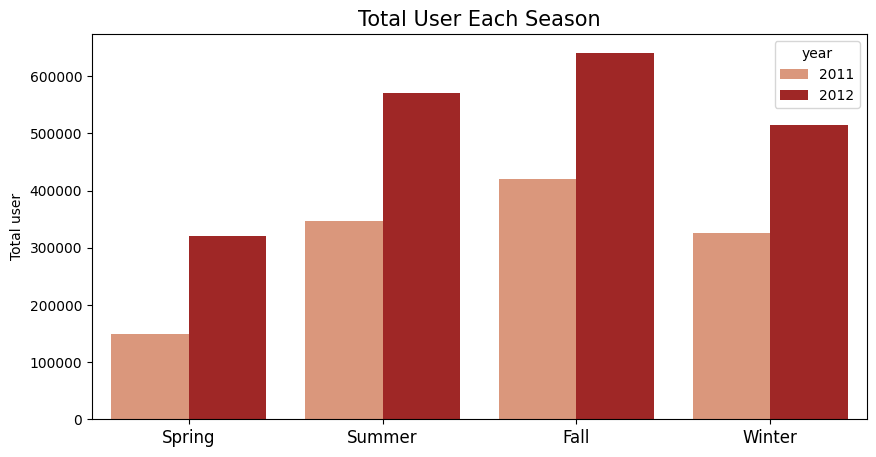

In [231]:
colors = ["#EA906C", "#B31312"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_user",
    x="season",
    hue="year",
    data=season_df,
    palette=colors
)

plt.title("Total User Each Season", loc="center", fontsize=15)
plt.ylabel("Total user")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Pengguna paling meminati musim gugur, dengan total user yang paling banyak, untuk menggunakan jasa bike sharing. Sedangkan musim yang memiliki total user paling sedikit adalah musim semi.

In [232]:
weather_df = day_df.groupby(by=["yr", "weathersit"]).agg({
    "cnt": "sum"
}).reset_index()
weather_df.rename(columns={
    "yr": "year",
    "cnt": "total_user"
}, inplace=True)
weather_df

,year,weathersit,total_user
0,2011,Clear/Partly Cloudy,835067
1,2011,Misty and Cloudy,382924
2,2011,Light Snow/Light Rain,25112
3,2012,Clear/Partly Cloudy,1422885
4,2012,Misty and Cloudy,613934
5,2012,Light Snow/Light Rain,12757


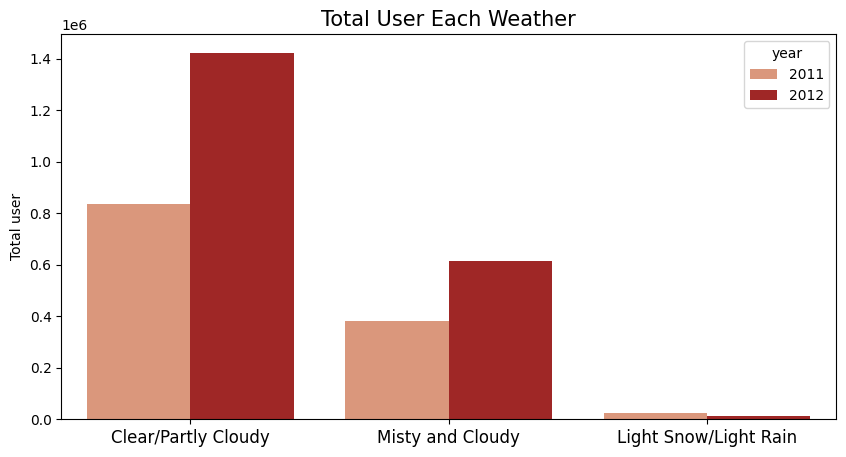

In [233]:
colors = ["#EA906C", "#B31312"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_user",
    x="weathersit",
    hue="year",
    data=weather_df,
    palette=colors
)

plt.title("Total User Each Weather", loc="center", fontsize=15)
plt.ylabel("Total user")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Banyak pengguna jasa bike sharing yang menggunakan jasa ini pada cuaca yang berawan. Pengguna jarang menggunakan jasa ini ketika turun salju atau turun hujan yang ringan.

## Conclusion

- Conclusion pertanyaan 1 dan 2:

Jumlah pengguna yang telah melakukan registrasi selalu lebih banyak daripada pengguna kasual dan jumlah keduanya meningkat secara signifikan pada tahun 2012 yang menandakan berkembangnya minat pengguna untuk menggunakan jasa bike sharing ini.
- Conclusion pertanyaan 3:

Minat pengguna jasa ini paling tinggi pada pertengahan tahun (Juni pada tahun 2011 dan September pada tahun 2012) dan paling rendah pad awal tahun (Januari).
Pengguna juga paling aktif menggunakan jasa ini pada musim gugur dan saat cuaca berawan dan paling sedikit pada musim semi dan ketika turun hujan atau salju yang ringan. 